In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_path = './Journal Datasets/final_combined.csv'

df = pd.read_csv(dataset_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    60000 non-null  object
 1   label   60000 non-null  object
dtypes: object(2)
memory usage: 937.6+ KB


In [3]:
df['label'] = df['label'].replace({
    "0": 'sadness',
    "1": 'joy',
    "2": 'love',
    "3": 'anger',
    "4": 'fear',
    "5":'surprise'
})

df['label'].unique()

array(['sadness', 'joy', 'fear', 'anger', 'love', 'surprise', 'empty',
       'enthusiasm', 'neutral', 'worry', 'fun', 'hate', 'happiness',
       'boredom', 'relief'], dtype=object)

<Axes: xlabel='label'>

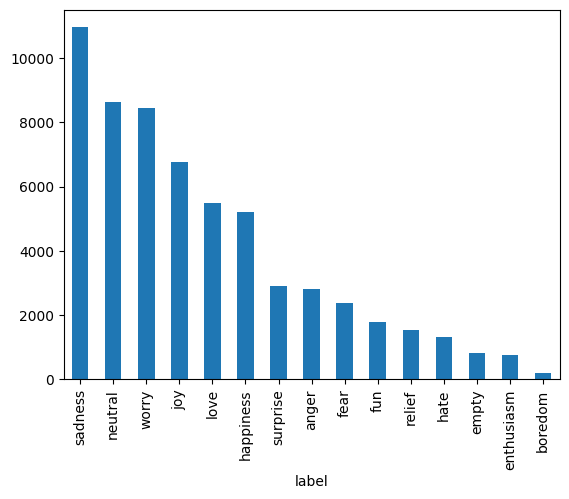

In [4]:
df["label"].value_counts().plot(kind='bar')

In [5]:
print(df.isnull().sum())

text     0
label    0
dtype: int64


In [6]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [7]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        else:
            filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [8]:
df['processed_text'] = df["text"].apply(preprocess)